# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [4]:
# %pip install tensorflow --upgrade
# %pip install keras --upgrade
# %pip install scikit-learn
# %pip install matplotlib
# %pip install numpy
# %pip install np_utils
import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn import metrics as me
from keras.utils import to_categorical
%matplotlib inline

## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [6]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
60000 train samples
10000 test samples


Create the MLP

In [35]:
model = Sequential()
model.add(Dense(2, input_shape=(784,), activation='relu'))
model.add(Dense(6,input_shape=(784,), activation='relu'))
model.add(Dense(6,input_shape=(784,), activation='relu'))

#model.add(Dropout(0.1))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │            70 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,700 (6.64 KB)

 Trainable params: 1,700 (6.64 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train the MLP

In [36]:
batch_size = 128
n_epoch = 30

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.1865 - loss: 2.1291 - val_accuracy: 0.3212 - val_loss: 1.7193
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3435 - loss: 1.6844 - val_accuracy: 0.4727 - val_loss: 1.3883
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5165 - loss: 1.3257 - val_accuracy: 0.6565 - val_loss: 1.0278
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6451 - loss: 1.0581 - val_accuracy: 0.6907 - val_loss: 0.9229
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6751 - loss: 0.9784 - val_accuracy: 0.7080 - val_loss: 0.8816
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6874 - loss: 0.9473 - val_accuracy: 0.7150 - val_loss: 0.8598
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6959 - loss: 0.9281 - val_accuracy: 0.7238 - val_loss: 0.8468
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6987 - loss: 0.9156 - val_accuracy: 0.

Show the performance of the model

Test score: 0.8614269495010376
Test accuracy: 0.7267000079154968


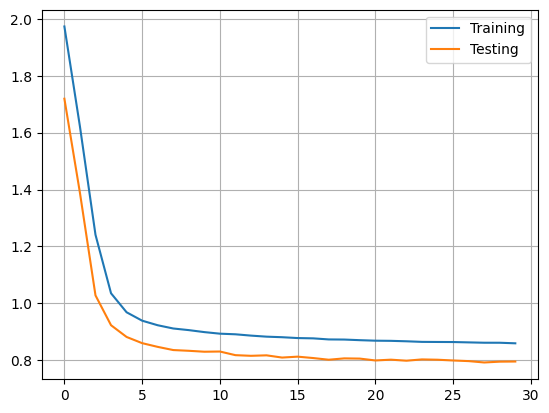

In [37]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[ 861,    4,   27,    1,    0,   16,   67,    2,    2,    0],
       [   1, 1083,    3,    7,    1,    1,    1,    8,   29,    1],
       [ 103,    8,  641,  147,    9,   54,   17,    4,   48,    1],
       [   3,   33,   93,  711,    1,   10,    1,   68,   85,    5],
       [   2,    0,    0,    0,  845,    5,   42,    1,    8,   79],
       [  44,   17,   95,   50,   26,  253,   62,   56,  267,   22],
       [  60,    0,    0,    0,   30,   16,  840,    0,   12,    0],
       [   2,   55,    1,   24,   11,    5,    1,  771,   25,  133],
       [  35,   59,   47,   69,   36,  139,   34,   67,  463,   25],
       [   6,    6,    3,    6,  109,    8,   11,   34,   27,  799]],
      dtype=int64)